# Adrian Khlim

## Identifying Global Shark Attack Patterns By Clustering

In [534]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The dataset I will be using is the Global Shark Attack dataset on Kaggle, compiled by the Global Shark Attack File.

In [535]:
shark_df = pd.read_csv('attacks.csv', encoding='latin1')
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [536]:
for col in shark_df.columns:
    print(f"{col}")

Case Number
Date
Year
Type
Country
Area
Location
Activity
Name
Sex 
Age
Injury
Fatal (Y/N)
Time
Species 
Investigator or Source
pdf
href formula
href
Case Number.1
Case Number.2
original order
Unnamed: 22
Unnamed: 23


In [537]:
shark_df.shape[0]


25723

In [538]:
shark_df["href"].head()

0    http://sharkattackfile.net/spreadsheets/pdf_di...
1    http://sharkattackfile.net/spreadsheets/pdf_di...
2    http://sharkattackfile.net/spreadsheets/pdf_di...
3    http://sharkattackfile.net/spreadsheets/pdf_di...
4    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href, dtype: object

In [539]:
shark_df["Investigator or Source"].head()

0                  R. Collier, GSAF
1    K.McMurray, TrackingSharks.com
2    K.McMurray, TrackingSharks.com
3                    B. Myatt, GSAF
4                         A .Kipper
Name: Investigator or Source, dtype: object

<Axes: >

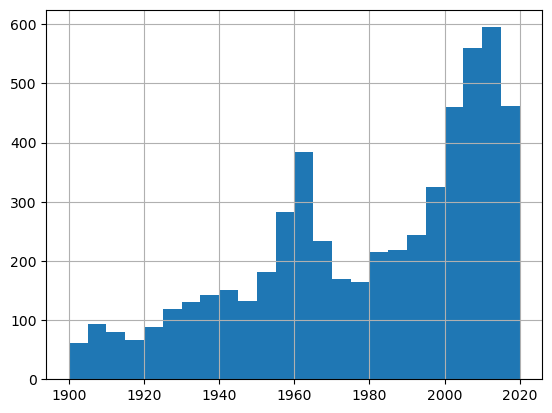

In [540]:
shark_df['Year'].hist(bins=range(1900, 2025, 5))

In [541]:
shark_df["Type"].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

<Axes: xlabel='Type'>

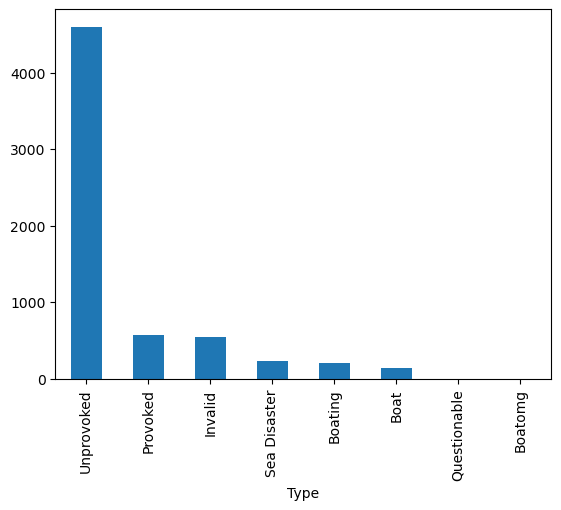

In [542]:
shark_df["Type"].value_counts().plot(kind='bar')   

In [543]:
shark_df["Type"].value_counts(dropna=False)


Type
NaN             19425
Unprovoked       4595
Provoked          574
Invalid           547
Sea Disaster      239
Boating           203
Boat              137
Questionable        2
Boatomg             1
Name: count, dtype: int64

In [544]:
shark_df["Type"].value_counts(dropna=False)


Type
NaN             19425
Unprovoked       4595
Provoked          574
Invalid           547
Sea Disaster      239
Boating           203
Boat              137
Questionable        2
Boatomg             1
Name: count, dtype: int64

In [545]:
# In type, set Boatomg to Boating
shark_df["Type"] = shark_df["Type"].replace("Boatomg", "Boating")
shark_df["Type"] = shark_df["Type"].replace("Boat", "Boating")
shark_df["Type"].fillna("Unknown")

0           Boating
1        Unprovoked
2           Invalid
3        Unprovoked
4          Provoked
            ...    
25718       Unknown
25719       Unknown
25720       Unknown
25721       Unknown
25722       Unknown
Name: Type, Length: 25723, dtype: object

In [546]:
shark_df["Type"].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan], dtype=object)

In [547]:
shark_df["Activity"]


0           Paddling
1           Standing
2            Surfing
3            Surfing
4        Free diving
            ...     
25718            NaN
25719            NaN
25720            NaN
25721            NaN
25722            NaN
Name: Activity, Length: 25723, dtype: object

In [548]:
shark_df["Activity"].isna().sum()

19965

In [549]:
shark_df.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [550]:
shark_df.isnull().sum()


Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [551]:
(shark_df.isnull().mean() * 100).sort_values(ascending=False)


Unnamed: 22               99.996112
Unnamed: 23               99.992225
Time                      88.539439
Species                   86.533453
Age                       86.506240
Sex                       77.697003
Activity                  77.615364
Location                  77.599813
Fatal (Y/N)               77.595926
Area                      77.269370
Name                      76.316915
Country                   75.694903
Injury                    75.609377
Investigator or Source    75.566614
Type                      75.516075
Year                      75.508300
href formula              75.504412
Date                      75.500525
pdf                       75.500525
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Case Number               66.170353
dtype: float64

In [552]:
cols_to_drop = [
    "Case Number", "Case Number.1", "Case Number.2",
    "original order", "pdf", "href", "href formula",
    "Investigator or Source", "Unnamed: 22", "Unnamed: 23",
    "Name"
]

shark_df = shark_df.drop(columns=cols_to_drop, errors='ignore')


In [553]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [554]:
shark_df["Activity"].value_counts().sum()

5758

There seems to be too many types of activities to easily group, so I will likely omit this when modeling

In [555]:
shark_df["Time"].isna().sum()

22775

In [556]:
shark_df["Fatal (Y/N)"].value_counts(dropna=False)

Fatal (Y/N)
NaN        19960
N           4293
Y           1388
UNKNOWN       71
 N             7
M              1
2017           1
N              1
y              1
Name: count, dtype: int64

In [557]:
shark_df[["Country", "Area", "Location"]].isnull().mean() * 100

Country     75.694903
Area        77.269370
Location    77.599813
dtype: float64

In [558]:
shark_df["Country"].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [559]:
shark_df["Country"].shape[0]

25723

In [560]:
shark_df["Country"].isna().sum()

19471

Looks like there are lots of rows without data (about 19k), and it would be hard to fill in some of them. I'm currently leaning into looking at geographical location since activity would be too complex. I'll drop all the columns with null values under Country.

In [561]:
geo_df = shark_df.dropna(subset=["Country"]).copy()
geo_df.shape


(6252, 13)

We are now down to around 6200 rows, let's check our data again.

In [562]:
geo_df.isna().sum()

Date              0
Year              2
Type              4
Country           0
Area            420
Location        501
Activity        537
Sex             561
Age            2790
Injury           26
Fatal (Y/N)     534
Time           3311
Species        2800
dtype: int64

In [563]:
geo_df["Country"].isna().sum()

0

In [564]:
geo_df.loc[:, "Fatal (Y/N)"] = geo_df["Fatal (Y/N)"].fillna("Unknown")


In [565]:
geo_df.isna().sum()

Date              0
Year              2
Type              4
Country           0
Area            420
Location        501
Activity        537
Sex             561
Age            2790
Injury           26
Fatal (Y/N)       0
Time           3311
Species        2800
dtype: int64

I was interested in time and species but 3300 and 2800 missing values is almost half, along with age, so I will drop those. We'll fill in Year and Type since there aren't many. We'll also drop sex and area as they aren't as relevant or consistent. Below, location also isn't consistent, as some are descriptions. Also too many unique values.

In [566]:
list(geo_df["Location"].unique())


['Oceanside, San Diego County',
 'St. Simon Island, Glynn County',
 'Habush, Oahu',
 'Arrawarra Headland',
 'La Ticla',
 'Flat Rock, Ballina',
 'Piedade Beach, Recife',
 'Lighhouse Point Park, Ponce Inlet, Volusia County',
 'Cocoa Beach, Brevard  County',
 'Daytona Beach, Volusia County',
 'Cairns Aquarium',
 'Isle of Palms,  Charleston County',
 'Hilton Head Island, Beaufort County',
 "Off Land's End",
 'Dugong Bay',
 'Nahoon Beach, East London',
 'Sharpes Beach, Ballina',
 'Sai Noi Beach',
 'Manuelita',
 'Gearys Beach',
 'Lennox Head',
 'Surfers Point, Prevelly',
 'South Point, Gracetown',
 'Madoogali',
 'Robberg Beach, Plettenberg Bay',
 'Shipwreck\x92s Beach, Keoneloa Bay, Kauai',
 'Piedade',
 'Lefthanders, Margaret River Area',
 'Cobblestones, Margaret River Area',
 'Nirvana Beach',
 'Praia de Sauaçuhy, Maceió',
 'Magenta Beach, Noumea',
 'Bimini',
 'St. Francis Bay',
 'Kukio Beach',
 "Waterman's Bay",
 'Lorne',
 'Winkipop',
 'Durban',
 'Little Congwong Beach, La Perouse ',
 'West

In [567]:
geo_df.loc[:, "Type"] = geo_df["Type"].fillna("Unknown")
geo_df = geo_df.dropna(subset=["Year"])


In [568]:
print(geo_df.columns.tolist())


['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ']


In [569]:
cols_to_drop_geo = ["Age", "Time", "Species ", "Area", "Sex ", "Location", "Activity", "Date"]

geo_df = geo_df.drop(columns=cols_to_drop_geo)

In [570]:
geo_df.isna().sum()

Year            0
Type            0
Country         0
Injury         26
Fatal (Y/N)     0
dtype: int64

In [571]:
geo_df["Injury"] = geo_df["Injury"].fillna("Unknown")

In [572]:
geo_df.isna().sum()

Year           0
Type           0
Country        0
Injury         0
Fatal (Y/N)    0
dtype: int64

Now my data is fairly clean, I doubt I will use injury for modeling since it's full of unique descriptions, which is likely not great for modeling and pattern finding. Regardless, lets make some visualizations with the new clean dataframe.

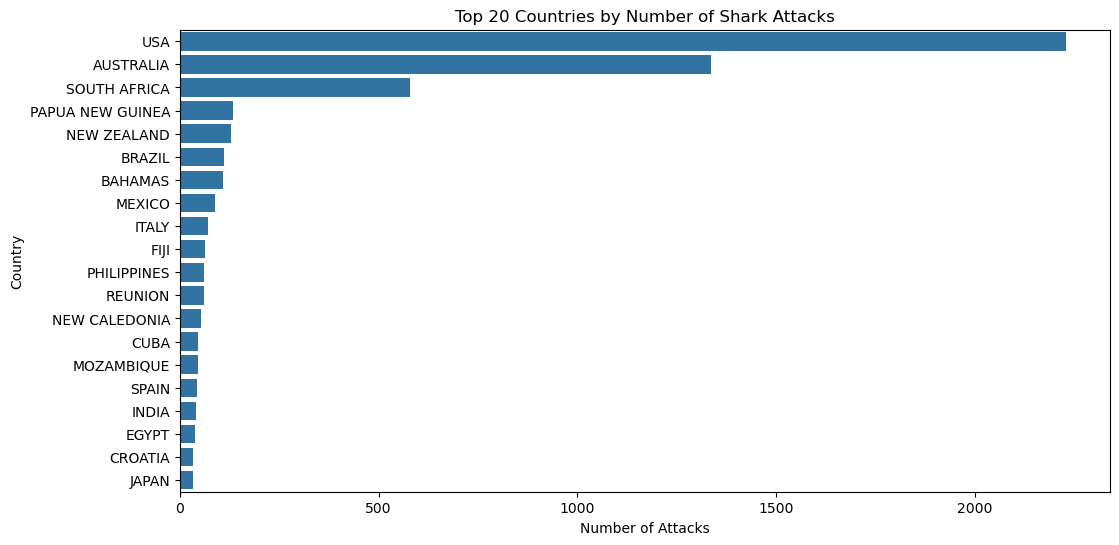

In [573]:
country_counts = geo_df["Country"].value_counts().head(20)  # top 20 countries

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 20 Countries by Number of Shark Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.show()

We can see here that the USA has the most shark attacks. This could be because of the large size of the country, and the coastal perimeter is probably extremely large. That, and Hawaii is likely a big hot spot. However, what about fatal shark attacks?

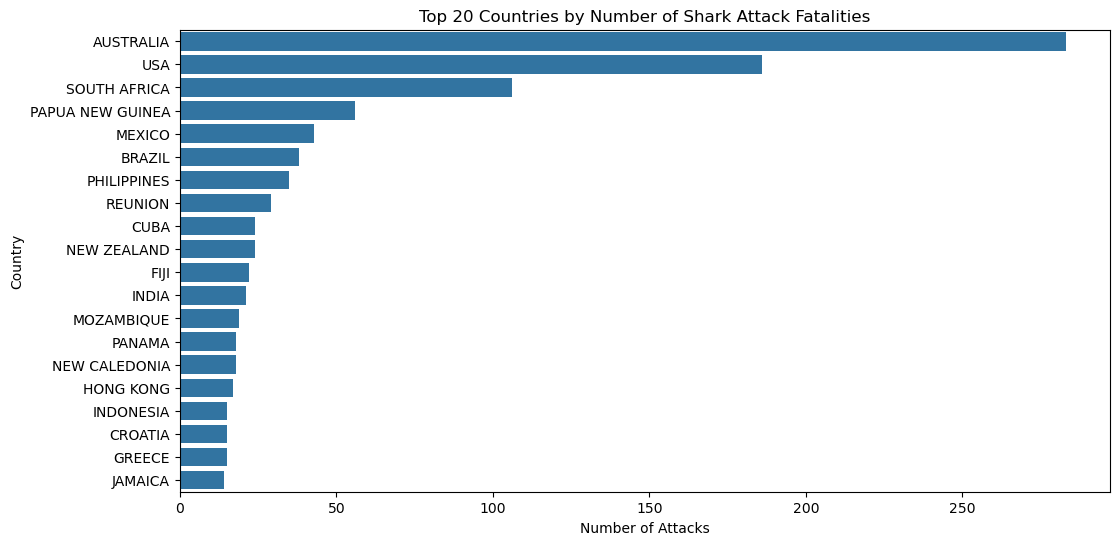

In [574]:
fatal_df = geo_df[geo_df["Fatal (Y/N)"] == "Y"]
country_counts = fatal_df["Country"].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 20 Countries by Number of Shark Attack Fatalities")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.show()

In [575]:
geo_df["Year"].value_counts().sort_index().tail(20)

Year
1999.0     66
2000.0     97
2001.0     92
2002.0     88
2003.0     92
2004.0     92
2005.0    103
2006.0    103
2007.0    112
2008.0    122
2009.0    120
2010.0    101
2011.0    128
2012.0    117
2013.0    122
2014.0    126
2015.0    143
2016.0    130
2017.0    135
2018.0     53
Name: count, dtype: int64

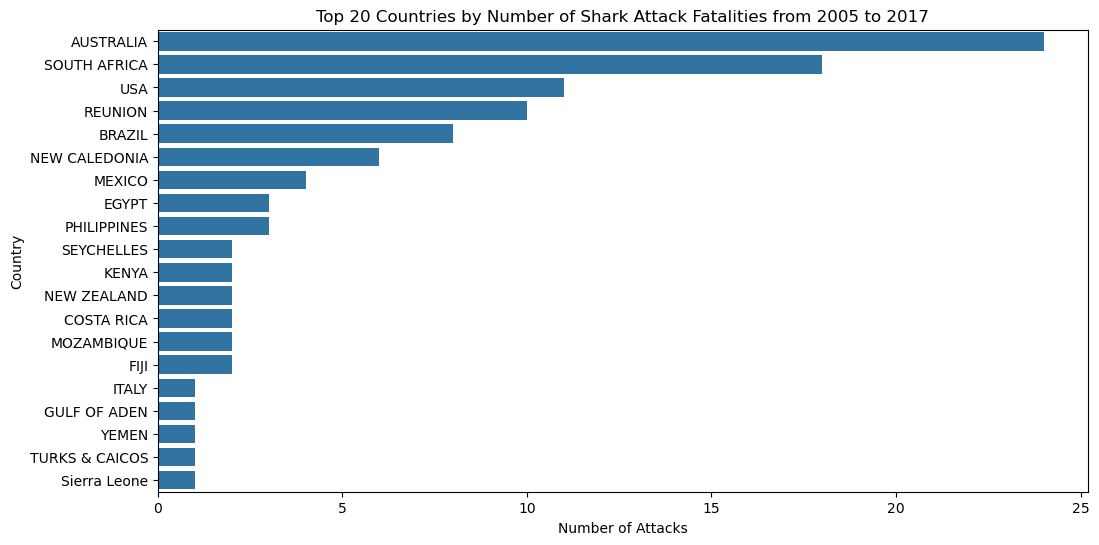

In [576]:
fatal_df_2018 = geo_df[(geo_df["Fatal (Y/N)"] == "Y") & (geo_df["Year"] >= 2005.0) & (geo_df["Year"] <= 2017.0)]
country_counts = fatal_df_2018["Country"].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 20 Countries by Number of Shark Attack Fatalities from 2005 to 2017")
plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.show()

Here we see Australia as the lead runner for fatal shark attacks. South Africa and the USA are second and third from 2005 and 2017, but in the whole dataset, USA is second for fatalities. This could be due to the dataset and unrecorded attacks. Regardless, they both stand under Australia, a continent known for an incredible variety of dangerous animals.

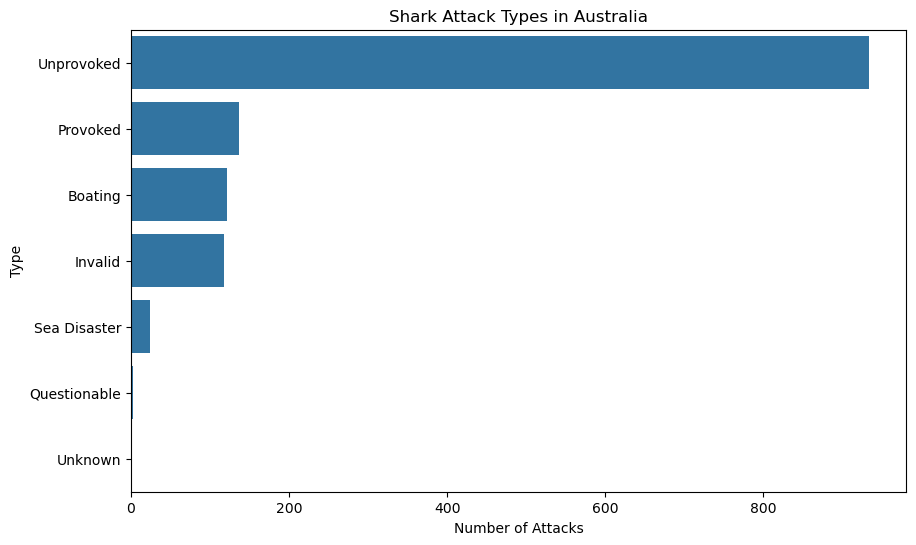

In [577]:
# plot type and Australia
australia_df = geo_df[geo_df["Country"] == "AUSTRALIA"]
type_counts = australia_df["Type"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=type_counts.values, y=type_counts.index)
plt.title("Shark Attack Types in Australia")
plt.xlabel("Number of Attacks")
plt.ylabel("Type")
plt.show()

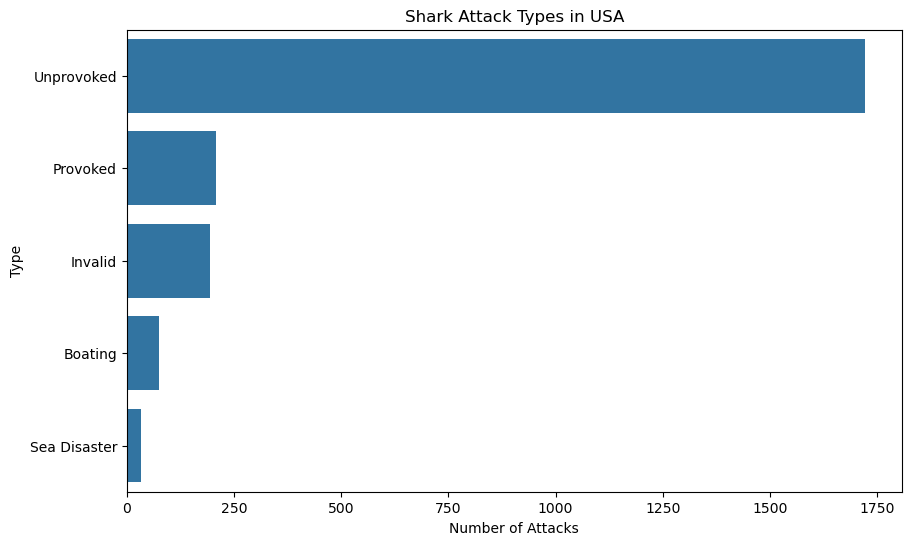

In [578]:
usa = geo_df[(geo_df["Country"] == "USA")]
type_counts = usa["Type"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=type_counts.values, y=type_counts.index)
plt.title("Shark Attack Types in USA")
plt.xlabel("Number of Attacks")
plt.ylabel("Type")
plt.show()

It looks like most shark attacks are unprovoked, meaning even if you are swimming safely and trying to avoid shark interactions, it does not matter. This is a reminder that the ocean is their home, not ours. 

# Clustering
So now I am sure I want to cluster by countries. The first thing I want is the fatality rate of attacks, since I want to see how dangerous countries coastlines can be.

In [579]:
country_total = geo_df.groupby("Country").size()

fatal_only = geo_df[geo_df["Fatal (Y/N)"] == "Y"]
country_fatal = fatal_only.groupby("Country")["Fatal (Y/N)"].count()

fatal_stats = pd.DataFrame({
    "total_attacks": country_total,
    "fatal_attacks": country_fatal
})


In [580]:
fatal_stats

,total_attacks,fatal_attacks
Country,,
PHILIPPINES,1,1.0
TONGA,3,2.0
ADMIRALTY ISLANDS,1,NaN
AFRICA,1,1.0
ALGERIA,1,1.0
...,...,...
VIETNAM,15,2.0
WEST INDIES,2,2.0
WESTERN SAMOA,1,1.0


I see we have a null value, lets turn those into 0s.

In [581]:
fatal_stats["fatal_attacks"] = fatal_stats["fatal_attacks"].fillna(0)

fatal_stats["fatal_rate"] = fatal_stats["fatal_attacks"] / fatal_stats["total_attacks"]

fatal_stats

,total_attacks,fatal_attacks,fatal_rate
Country,,,
PHILIPPINES,1,1.0,1.000000
TONGA,3,2.0,0.666667
ADMIRALTY ISLANDS,1,0.0,0.000000
AFRICA,1,1.0,1.000000
ALGERIA,1,1.0,1.000000
...,...,...,...
VIETNAM,15,2.0,0.133333
WEST INDIES,2,2.0,1.000000
WESTERN SAMOA,1,1.0,1.000000


I also see lots of countries with only a few rows, so I likely want to exclude them. I assume they would add noise or weights that are not as consistent since there are not enough attacks for good proportion rates.

In [582]:
# Keep only countries with >= 10 (original) attacks, changed to a higher number because of small sample sizes
valid_countries = country_total[country_total >= 15].index

fatal_stats_10 = fatal_stats.loc[valid_countries].copy()

fatal_rate = fatal_stats_10["fatal_rate"]
total_attacks_10 = fatal_stats_10["total_attacks"]


In [583]:
valid_countries

Index(['ATLANTIC OCEAN', 'AUSTRALIA', 'BAHAMAS', 'BERMUDA', 'BRAZIL',
       'COSTA RICA', 'CROATIA', 'CUBA', 'EGYPT', 'ENGLAND', 'FIJI',
       'FRENCH POLYNESIA', 'GREECE', 'HONG KONG', 'INDIA', 'INDONESIA', 'IRAN',
       'ITALY', 'JAMAICA', 'JAPAN', 'MEXICO', 'MOZAMBIQUE', 'NEW CALEDONIA',
       'NEW ZEALAND', 'PACIFIC OCEAN', 'PANAMA', 'PAPUA NEW GUINEA',
       'PHILIPPINES', 'REUNION', 'SOLOMON ISLANDS', 'SOUTH AFRICA', 'SPAIN',
       'TONGA', 'USA', 'VIETNAM'],
      dtype='object', name='Country')

In [584]:
fatal_stats_10.head()

,total_attacks,fatal_attacks,fatal_rate
Country,,,
ATLANTIC OCEAN,17,8.0,0.470588
AUSTRALIA,1337,283.0,0.211668
BAHAMAS,109,10.0,0.091743
BERMUDA,16,2.0,0.125000
BRAZIL,112,38.0,0.339286


In [585]:
fatal_rate

Country
ATLANTIC OCEAN      0.470588
AUSTRALIA           0.211668
BAHAMAS             0.091743
BERMUDA             0.125000
BRAZIL              0.339286
COSTA RICA          0.470588
CROATIA             0.441176
CUBA                0.521739
EGYPT               0.315789
ENGLAND             0.181818
FIJI                0.354839
FRENCH POLYNESIA    0.080000
GREECE              0.600000
HONG KONG           0.708333
INDIA               0.525000
INDONESIA           0.652174
IRAN                0.448276
ITALY               0.197183
JAMAICA             0.518519
JAPAN               0.352941
MEXICO              0.483146
MOZAMBIQUE          0.422222
NEW CALEDONIA       0.339623
NEW ZEALAND         0.187500
PACIFIC OCEAN       0.470588
PANAMA              0.562500
PAPUA NEW GUINEA    0.417910
PHILIPPINES         0.573770
REUNION             0.483333
SOLOMON ISLANDS     0.400000
SOUTH AFRICA        0.183074
SPAIN               0.181818
TONGA               0.266667
USA                 0.083445
VIETNA

In [586]:

geo10_df = geo_df[geo_df["Country"].isin(valid_countries)]

# 1. encode Type (one-hot)
type_dummies = pd.get_dummies(geo10_df["Type"], prefix="Type")

# 2. merge encoded columns into df
df_with_types = pd.concat([geo10_df, type_dummies], axis=1)

# 3. group by country and compute mean 
type_by_country = df_with_types.groupby("Country")[type_dummies.columns].mean()


In [587]:
type_by_country.head()

,Type_Boating,Type_Invalid,Type_Provoked,Type_Questionable,Type_Sea Disaster,Type_Unknown,Type_Unprovoked
Country,,,,,,,
ATLANTIC OCEAN,0.235294,0.117647,0.058824,0.000000,0.294118,0.000000,0.294118
AUSTRALIA,0.091249,0.088257,0.101720,0.001496,0.017951,0.000748,0.698579
BAHAMAS,0.009174,0.045872,0.128440,0.000000,0.045872,0.000000,0.770642
BERMUDA,0.062500,0.187500,0.125000,0.000000,0.187500,0.000000,0.437500
BRAZIL,0.000000,0.089286,0.044643,0.000000,0.044643,0.000000,0.821429


In [588]:
country_features = pd.concat([fatal_rate, type_by_country], axis=1)
country_features["total_attacks"] = total_attacks_10
country_features.head()

,fatal_rate,Type_Boating,Type_Invalid,Type_Provoked,Type_Questionable,Type_Sea Disaster,Type_Unknown,Type_Unprovoked,total_attacks
Country,,,,,,,,,
ATLANTIC OCEAN,0.470588,0.235294,0.117647,0.058824,0.000000,0.294118,0.000000,0.294118,17
AUSTRALIA,0.211668,0.091249,0.088257,0.101720,0.001496,0.017951,0.000748,0.698579,1337
BAHAMAS,0.091743,0.009174,0.045872,0.128440,0.000000,0.045872,0.000000,0.770642,109
BERMUDA,0.125000,0.062500,0.187500,0.125000,0.000000,0.187500,0.000000,0.437500,16
BRAZIL,0.339286,0.000000,0.089286,0.044643,0.000000,0.044643,0.000000,0.821429,112


Now I have rows of countries against columns which are the attack types, fatality rates, and total attacks. 

In [589]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_features)

c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

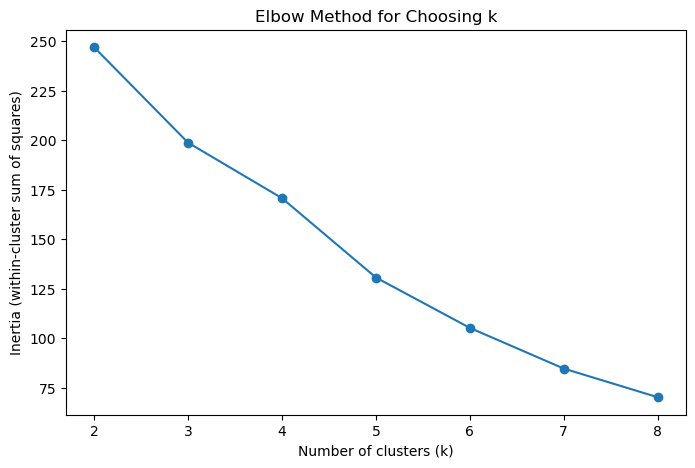

In [590]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(2, 9)  # try k = 2,3,...,8

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow Method for Choosing k")
plt.show()


It looks like the graph gets a lot flatter at k = 3, and mayber k = 5. Lets go with 3.

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
country_features["cluster"] = kmeans.fit_predict(X_scaled) # we add a column based off the model's cluster choice


c:\Users\adria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Country
ATLANTIC OCEAN      0
AUSTRALIA           2
BAHAMAS             1
BERMUDA             0
BRAZIL              1
COSTA RICA          1
CROATIA             0
CUBA                1
EGYPT               1
ENGLAND             0
FIJI                1
FRENCH POLYNESIA    1
GREECE              1
HONG KONG           1
INDIA               1
INDONESIA           1
IRAN                1
ITALY               0
JAMAICA             1
JAPAN               1
MEXICO              1
MOZAMBIQUE          1
NEW CALEDONIA       1
NEW ZEALAND         0
PACIFIC OCEAN       0
PANAMA              1
PAPUA NEW GUINEA    1
PHILIPPINES         1
REUNION             1
SOLOMON ISLANDS     1
SOUTH AFRICA        0
SPAIN               0
TONGA               1
USA                 2
VIETNAM             1
Name: cluster, dtype: int32

In [601]:
country_features.sort_values("cluster").head()


,fatal_rate,Type_Boating,Type_Invalid,Type_Provoked,Type_Questionable,Type_Sea Disaster,Type_Unknown,Type_Unprovoked,total_attacks,cluster
Country,,,,,,,,,,
ATLANTIC OCEAN,0.470588,0.235294,0.117647,0.058824,0.0,0.294118,0.0,0.294118,17,0
SPAIN,0.181818,0.022727,0.227273,0.113636,0.0,0.000000,0.0,0.636364,44,0
SOUTH AFRICA,0.183074,0.089810,0.112263,0.093264,0.0,0.008636,0.0,0.696028,579,0
PACIFIC OCEAN,0.470588,0.000000,0.058824,0.176471,0.0,0.588235,0.0,0.176471,17,0
NEW ZEALAND,0.187500,0.117188,0.093750,0.156250,0.0,0.000000,0.0,0.632812,128,0


In [593]:
country_features.groupby("cluster").mean()


,fatal_rate,Type_Boating,Type_Invalid,Type_Provoked,Type_Questionable,Type_Sea Disaster,Type_Unknown,Type_Unprovoked,total_attacks
cluster,,,,,,,,,
0,0.270972,0.098507,0.140340,0.150935,0.000000,0.126092,0.000000,0.484126,103.111111
1,0.419239,0.012511,0.057224,0.050946,0.000000,0.077486,0.002778,0.799055,47.708333
2,0.147557,0.062448,0.087422,0.097518,0.000748,0.016153,0.000374,0.735337,1783.000000


Here we can see our chosen 3 clusters. Now we can identify patterns.

It looks like cluster 0 seems to have to smallest unprovoked rate, with a moderately high fatality rate (27%) and the highest invalid, provoked, and sea disaster rates.

Cluster 1 has the highest fatality rat at 42.9%, the highest unprovoked rate at 79.9%, but only total attacks is only 47 on average.

Cluster 2 has the smallest fatality rate at 14.7%, but it also has the second highest unprovoked rate at 73.5% but an extremely high total attack count average at 1783. 

This suggests that for cluster 0, there are many different types of attacks, about half provoked and half unprovoked, which lead to a decently high fatality rate at 27%. The shark attacks in these countries seem to be deadly.

Cluster 1 suggests that these countries shark attacks are deadly at 41.9%, yet mostly unprovoked at 79.9%, however have small reports of shark attacks or just have less shark attacks at 47 on average. The small attack counts suggest that either shark attacks don't happen often in these countries, or that they are not being reported. It also seems like these attacks are extremely deadly.

Cluster 2 shows a relatively small fatality rate at 14.7%, a similar unprovoked rate as cluster 1, but an extremely high attack count, meaning these countries get frequent shark attacks, or just a lot more recorded reports. This could mean that it is more likely to be bitten by a shark here, but relatively likely to survive.

In [594]:
for c in sorted(country_features["cluster"].unique()):
    print(f"\nCluster {c}:")
    print(country_features[country_features["cluster"] == c].index.tolist())



Cluster 0:
['ATLANTIC OCEAN', 'BERMUDA', 'CROATIA', 'ENGLAND', 'ITALY', 'NEW ZEALAND', 'PACIFIC OCEAN', 'SOUTH AFRICA', 'SPAIN']

Cluster 1:
['BAHAMAS', 'BRAZIL', 'COSTA RICA', 'CUBA', 'EGYPT', 'FIJI', 'FRENCH POLYNESIA', 'GREECE', 'HONG KONG', 'INDIA', 'INDONESIA', 'IRAN', 'JAMAICA', 'JAPAN', 'MEXICO', 'MOZAMBIQUE', 'NEW CALEDONIA', 'PANAMA', 'PAPUA NEW GUINEA', 'PHILIPPINES', 'REUNION', 'SOLOMON ISLANDS', 'TONGA', 'VIETNAM']

Cluster 2:
['AUSTRALIA', 'USA']


Now here we can see the countries and their clusters. What's surprising is that South Africa is not in the same cluster as Australia and the USA, but those clusters likely exist due to the extremely high number of reported records, and/or lower fatality rate.

Cluster 1 has the most countries, but that also makes sense as having a smaller mean average of reported shark attacks is understandable, as attacks being reported in the USA and Australia seems common.

Cluster 0 may be countries to not visit and swim in, as many of those attacks were unprovoked. 

<Axes: xlabel='cluster', ylabel='fatal_rate'>

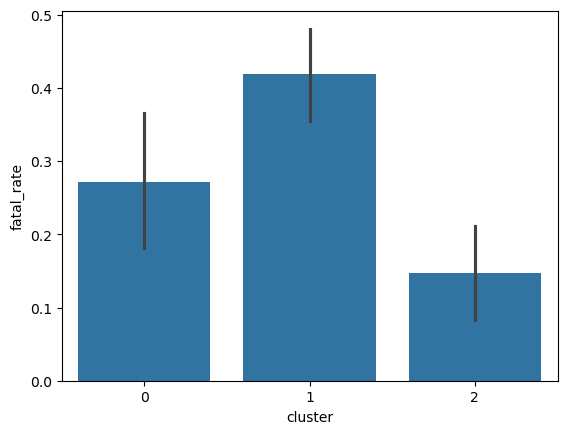

In [ ]:
sns.barplot(
    data=country_features,
    x="cluster",
    y="fatal_rate",
    estimator="mean"
)


<Axes: xlabel='cluster', ylabel='Type_Unprovoked'>

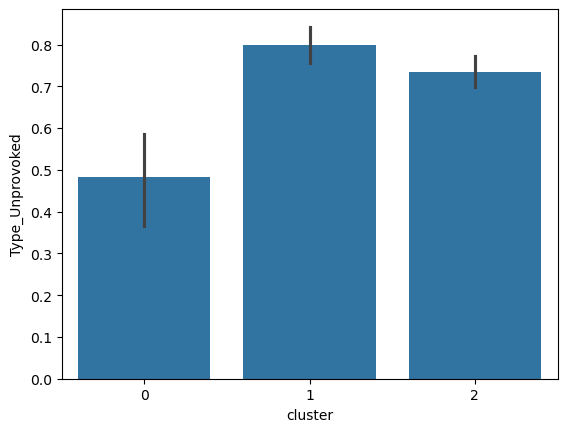

In [598]:
sns.barplot(
    data=country_features,
    x="cluster",
    y="Type_Unprovoked",
    estimator="mean"
)


<Axes: xlabel='total_attacks', ylabel='fatal_rate'>

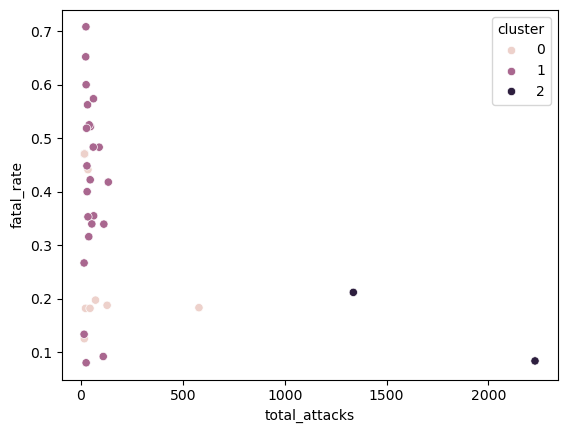

In [599]:
sns.scatterplot(
    data=country_features,
    x="total_attacks",
    y="fatal_rate",
    hue="cluster"
)



Here we can see how many more attack samples exists in cluster 2 (USA and AUSTRALIA) compared to the rest. You can also note how high the fatality rate is in cluster 1 compared to cluster 0, yet it can be seen that is not the only feature that groups these clusters, as we also see low fatality rate countries here. Very likely that unprovoked/provoked attacks plays a big part into these clusters.

## Conclusion

In conclusion, this k-means modeling represents how this data affects clustering, as there had to be a lot of filled in missing values, a lot of removal of rows, and thus picky feature choosing (or vice versa). Thus, this gave us smaller sample size and likely affected the clusters to not be as accurate or as separate as it could have been.

However, even then, we can still note patterns. There are countries where you may be attacked even without provoking sharks (cluster 0), there are countries with lower reported shark attacks, yet very high fatality rates (cluster 1), and there is the USA and Australia with very high recorded counts, but a relatively smaller fatality rate at 14.7%. Thus, this data can help people decide where they want to swim, snorkel, scuba, or research.

Acknowledgement: I acknowledge that I used ChatGPT, GitHub Copilot, Datacamp assignments, and Intro to Machine Learning assignments to assist in fixing the dataset (preprocessing), for some visualizations, and for K means training and clustering.
